In [1]:
import pandas as pd

In [2]:
# Load the Excel file
file_path = '../compile/compiled_data_normalized_ver2.xlsx'
data = pd.read_excel(file_path)

# Extract relevant columns
years = data['Tahun']
poverty_percentage = data['Persentase Kemiskinan']

In [13]:
poverty_percentage[:-1]

0     13.11
1     11.51
2     10.75
3     10.58
4      9.87
5     10.09
6     10.10
7      9.90
8      7.94
9      7.94
10     8.14
11     8.60
12     7.90
13     7.30
Name: Persentase Kemiskinan, dtype: float64

In [15]:
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(poverty_percentage[:-1])

(0.2046683659773909, True)

In [4]:
# Define training and testing sets
train_size = len(poverty_percentage) - 3
train, test = poverty_percentage[:train_size], poverty_percentage[train_size:]

In [16]:
from pmdarima import auto_arima

# Fit the Auto ARIMA model
# Membuat model Auto ARIMA dengan parameter kompleks
model = auto_arima(
    train,
    start_p=0,
    start_q=0,
    max_p=5,
    max_d=5,
    max_q=5,
    start_P=0,
    start_Q=0,
    max_P=5,
    max_D=5,
    max_Q=5,
    error_action='warn',
    trace=True,  # Menampilkan proses fitting model
    suppress_warnings=True,
    stepwise=True,  # Menggunakan pencarian stepwise untuk mempercepat proses pencarian model terbaik
    random_state=20,  # Mengatur seed untuk reproduktifitas
    n_fits=50  # Menentukan jumlah maksimum model yang akan dicoba
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28.555, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30.530, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30.511, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29.509, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32.490, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.273 seconds


In [17]:
# Forecast the next 3 data points
forecast = model.predict(n_periods=3)

In [19]:
forecast

12    8.19
13    7.78
14    7.37
dtype: float64

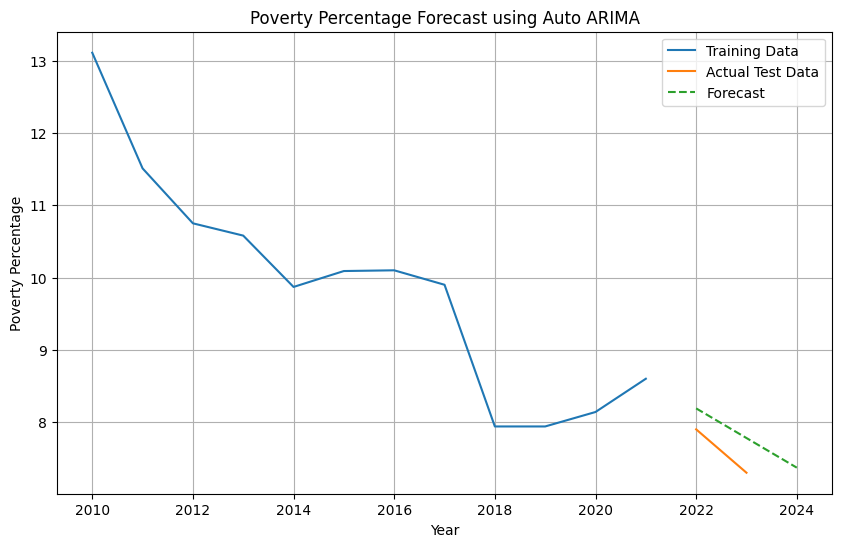

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years[:train_size], train, label='Training Data')
plt.plot(years[train_size:], test, label='Actual Test Data')
plt.plot(years[train_size:], forecast, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Poverty Percentage Forecast using Auto ARIMA')
plt.legend()
plt.grid(True)
plt.show()
